In [1]:
import os, json, glob, requests, torch, cv2
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
#set default path
TRAIN_JSON_PATH = r'C:\Users\User\Desktop\Code\Github\Final_project\eda\train'
VALID_JSON_PATH = r'C:\Users\User\Desktop\Code\Github\Final_project\eda\val'
TEST_JSON_PATH = r'C:\Users\User\Desktop\Code\Github\Final_project\eda\test'


In [7]:
def get_json_list_1d(json_folder_path): #returns a 1 dim array
    temp_loader = []
    json_train = []
    emotion_list_json = os.listdir(json_folder_path)

    for emotion in emotion_list_json:
        if 'neutral' not in emotion:
            with open (json_folder_path + "\\" + emotion, "r", encoding='euc-kr') as f:
                temp_loader.append(json.load(f))     
        else:
            with open(json_folder_path + "\\" + emotion, "r", encoding='utf-8') as f:
                temp_loader.append(json.load(f)) 

    for i in range(len(temp_loader)):
        json_train += temp_loader[i]     

    return json_train

In [8]:
#call for the functions
json_train = get_json_list_1d(TRAIN_JSON_PATH)
json_val = get_json_list_1d(VALID_JSON_PATH)
json_test = get_json_list_1d(TEST_JSON_PATH)


In [12]:
print(json_train[0].keys()) #see what keys are available
print(len(json_train))
print(len(json_val))
print(type(json_train[0]))

dict_keys(['filename', 'gender', 'age', 'isProf', 'faceExp_uploader', 'bg_uploader', 'annot_A', 'annot_B', 'annot_C'])
5994
1200
<class 'dict'>


In [17]:
train_df = pd.DataFrame(json_train, columns=['gender', 'age', 'isProf', 'faceExp_uploader', 'bg_uploader' ])
val_df = pd.DataFrame(json_val, columns=['gender', 'age', 'isProf', 'faceExp_uploader', 'bg_uploader' ])
test_df = pd.DataFrame(json_test, columns=['gender', 'age', 'isProf', 'faceExp_uploader', 'bg_uploader' ])
train_df

,gender,age,isProf,faceExp_uploader,bg_uploader
0,남,30,일반인,분노,교통/이동수단(엘리베이터 포함)
1,남,40,전문인,분노,문화재 및 유적지
2,여,20,전문인,분노,오락/공연시설
3,여,50,일반인,분노,공공시설/종교/의료시설
4,여,30,일반인,분노,상업시설/점포/시장
...,...,...,...,...,...
5989,여,50,일반인,슬픔,실외 자연환경
5990,남,40,전문인,슬픔,도심 환경
5991,여,20,전문인,슬픔,상업시설/점포/시장
5992,여,30,일반인,슬픔,숙박 및 거주공간


<Axes: ylabel='count'>

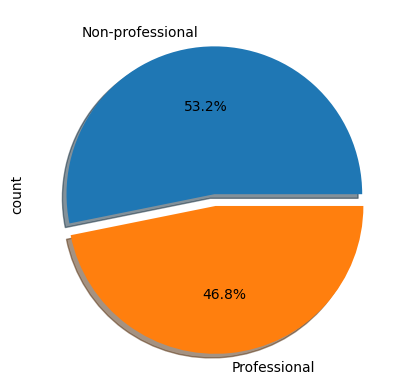

In [25]:
train_df.value_counts('isProf').plot.pie(explode=[0, 0.08],
                                          shadow=True,
                                          autopct='%1.1f%%',
                                          labels=['Non-professional', 'Professional'])